<a href="https://colab.research.google.com/github/JSJeong-me/Machine_Learning/blob/main/ML/13-RandomForest-SC-PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install -U pandas-profiling

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import pandas as pd
import numpy as np
import pandas_profiling

In [5]:
%matplotlib inline

In [6]:
df = pd.read_csv("./credit_cards_dataset.csv")

In [7]:
# df.profile_report()

In [8]:
#print("Original shape of the data: "+ str(df.shape))
features_names = df.columns

In [9]:
#df.describe()

In [10]:
X = df.iloc[:, 1:24].values
y = df.iloc[:, 24].values

In [11]:
from sklearn.preprocessing import StandardScaler

# Standard Scaler

In [12]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [13]:
X_sc = df.drop(['default.payment.next.month','ID'], axis =1).values
y = df['default.payment.next.month'].values
print(X_sc.shape)
print(y.shape)

(30000, 23)
(30000,)


# PCA

In [14]:
from sklearn.decomposition import PCA

In [15]:
# define the transform
trans = PCA(n_components=20)

# transform the data
X_dim = trans.fit_transform(X_sc)

Split my data into training and testing

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_dim, y, train_size=0.7, random_state=42, shuffle=True)

# Correlation

In [17]:
X_train.shape

(21000, 20)

In [18]:
X_df = pd.DataFrame(X_train)

In [19]:
X_df.corr().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.00,0.00,-0.00,0.01,0.02,-0.00,0.00,0.00,0.00,-0.00,0.01,0.01,-0.01,-0.00,0.01,-0.00,-0.00,-0.00,0.01,-0.01
1,0.00,1.00,0.00,-0.00,0.00,0.00,-0.00,-0.01,-0.00,-0.01,-0.01,-0.00,-0.00,0.01,-0.00,0.00,-0.01,0.00,0.00,0.00
2,-0.00,0.00,1.00,0.02,0.02,-0.01,-0.00,-0.02,0.01,0.00,-0.01,0.02,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00
3,0.01,-0.00,0.02,1.00,0.06,0.05,-0.01,-0.01,0.05,0.03,0.01,0.00,0.01,0.00,0.00,-0.01,-0.00,-0.00,-0.01,-0.01
4,0.02,0.00,0.02,0.06,1.00,-0.01,0.01,-0.01,0.03,0.00,0.01,0.01,0.02,-0.00,0.00,-0.01,-0.00,0.00,0.00,-0.00
5,-0.00,0.00,-0.01,0.05,-0.01,1.00,-0.03,0.01,-0.03,-0.02,-0.01,-0.00,-0.03,0.00,-0.00,0.00,-0.00,-0.00,-0.01,-0.00
6,0.00,-0.00,-0.00,-0.01,0.01,-0.03,1.00,0.01,0.01,-0.01,-0.02,-0.01,-0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,-0.01,-0.02,-0.01,-0.01,0.01,0.01,1.00,0.01,0.01,0.01,-0.03,0.03,0.01,0.00,0.00,0.00,-0.00,-0.00,0.00
8,0.00,-0.00,0.01,0.05,0.03,-0.03,0.01,0.01,1.00,0.03,0.01,0.01,0.01,0.00,0.01,-0.00,-0.00,0.00,-0.00,-0.00
9,-0.00,-0.01,0.00,0.03,0.00,-0.02,-0.01,0.01,0.03,1.00,0.02,-0.00,0.00,0.00,0.00,-0.01,0.00,-0.00,0.00,-0.00


Instantiate the random forest model with 200 trees

In [20]:
rf = RandomForestClassifier(n_estimators=200, criterion='entropy', max_features='log2', max_depth=15)

In [21]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2',
                       n_estimators=200)

In [22]:
y_predict = rf.predict(X_test)

Check feature importance


In [23]:
sorted(zip(rf.feature_importances_, features_names), reverse=True)

[(0.119775395487292, 'BILL_AMT3'),
 (0.08714936924332713, 'BILL_AMT4'),
 (0.07038428712614254, 'LIMIT_BAL'),
 (0.06301409078408796, 'BILL_AMT6'),
 (0.061237315842541086, 'PAY_AMT1'),
 (0.053947490938294484, 'PAY_AMT2'),
 (0.045771272837924176, 'ID'),
 (0.04350565827118329, 'BILL_AMT5'),
 (0.04197140356873935, 'PAY_3'),
 (0.041519738309859514, 'MARRIAGE'),
 (0.039590451162762115, 'BILL_AMT2'),
 (0.0389072040246961, 'SEX'),
 (0.03885103604448458, 'PAY_5'),
 (0.037892374406043525, 'PAY_0'),
 (0.03766236716831472, 'PAY_4'),
 (0.03760474172028532, 'PAY_6'),
 (0.03609155358166688, 'EDUCATION'),
 (0.03589150221340184, 'BILL_AMT1'),
 (0.03463298437733096, 'PAY_2'),
 (0.034599762891622456, 'AGE')]

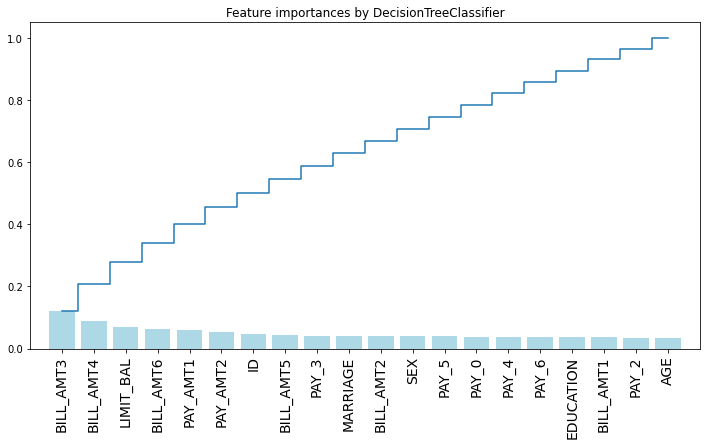

In [24]:
## plot the importances ##
import matplotlib.pyplot as plt
importances = rf.feature_importances_


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), features_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

# Making my prediction and seeing how well my model predicted by checking recall, precision, F1 score and making a confusion matrix.

Recall -tells us generally or overall how well our model predicted based on 
        the total of how much it correctly predicted /correctly predicted +                           how many where actually right but predicted wrong.
                        
                        formula = TP/TP+FN
                        
Precision -tells us or gives us true measure how well our model predicted it                              shows correctly predicted /correctly predicted + how many the model                            predicted to be positive but where false.

                       formula = TP/TP+FP
                       
F1 score - gives us a mean of precision and recall, a sumarization of how well it                        did in respect to recall and precision.


In [25]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [26]:
X_test.shape

(9000, 20)

In [27]:
#Make my predictions
y_prediction = rf.predict(X_test)

In [28]:
y_probability = rf.predict_proba(X_test)

In [29]:
y_probability.shape

(9000, 2)

In [30]:
print("Recall score:"+ str(recall_score(y_test, y_prediction)))

Recall score:0.33214285714285713


In [31]:
y_prediction.reshape(-1,1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [32]:
# This shows overall acuracy of how well it will predict defualt or non_default
# The scores corresponding to every class will tell you the accuracy of the classifier 
# in classifying the data points in that particular class compared to all other classes.
# The support is the number of samples of the true response that lie in that class.

print(classification_report(y_test, y_prediction,
                            target_names=["non_default", "default"]))

              precision    recall  f1-score   support

 non_default       0.84      0.95      0.89      7040
     default       0.65      0.33      0.44      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.64      0.67      9000
weighted avg       0.80      0.82      0.79      9000



In [33]:
# Creating confusion matrix would give us a ration of non-default compared 
# to default.

In [34]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

In [35]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

Confusion matrix, without normalization
[[6695  345]
 [1309  651]]


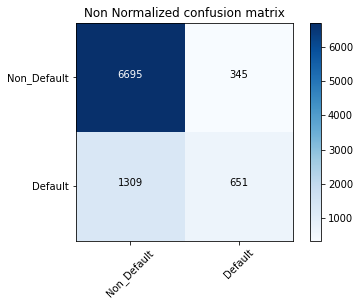

In [36]:
cnf_matrix = confusion_matrix(y_test, y_prediction)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non_Default','Default'], normalize=False,
                      title='Non Normalized confusion matrix')